In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [36]:
df.isnull().sum()

SampleCodeNumber            0
ClumpThickness              0
UniformityCellSize          0
UniformityCellShape         0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [8]:
for col in df.columns:
    if df[col].astype(str).str.contains(r"\?").any():
        print(f"Column '{col}' contains '?' values.")

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_cleaned = df[(df[numeric_cols] >= 0).all(axis=1)]

In [14]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply outlier removal to relevant columns (all numeric columns except 'id' and 'diagnosis')
df_no_outliers = remove_outliers_iqr(df_cleaned, df_cleaned.columns[2:])


In [16]:
df_no_outliers.shape

(277, 32)

In [17]:
# Encode the diagnosis column ('M' -> 1, 'B' -> 0)
df_transformed = df_no_outliers.copy()
df_transformed['diagnosis'] = df_transformed['diagnosis'].map({'M': 1, 'B': 0})

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Features and target
X = df_transformed.drop(['id', 'diagnosis'], axis=1)  # Drop 'id' and 'diagnosis' as they're not features
y = df_transformed['diagnosis']  # Target is 'diagnosis' (0: Benign, 1: Malignant)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_resampled, y_resampled = resample(X_train, y_train, 
                                    replace=True, 
                                    n_samples=len(X_train), 
                                    random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=3000,class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)

# Print the results
print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

# Classification reports
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.8750
Naive Bayes Accuracy: 0.9107

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.17      0.33      0.22         3

    accuracy                           0.88        56
   macro avg       0.56      0.62      0.58        56
weighted avg       0.92      0.88      0.89        56


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.38      1.00      0.55         3

    accuracy                           0.91        56
   macro avg       0.69      0.95      0.75        56
weighted avg       0.97      0.91      0.93        56



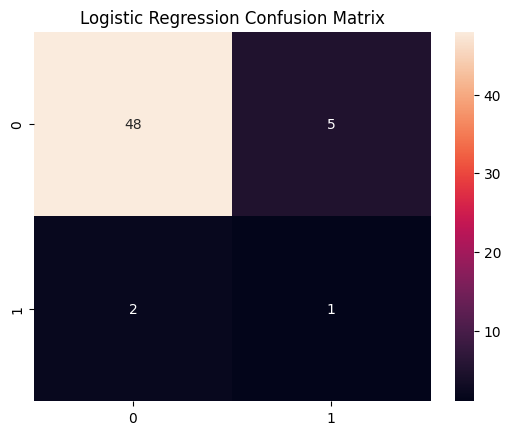

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

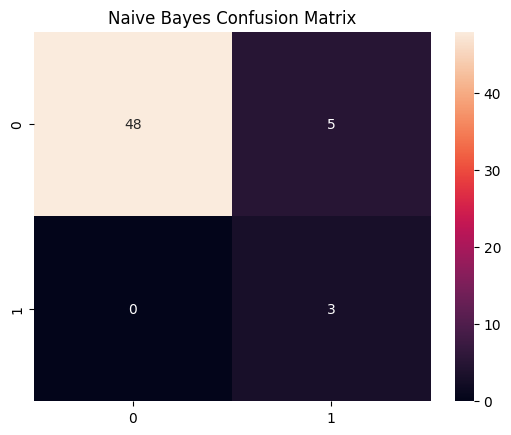

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')
plt.title("Naive Bayes Confusion Matrix")
plt.show()